In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [4]:
traffic_data = pd.read_csv('hw03-data/Traffic Data/Lekagul Sensor Data.csv')
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['Timestamp'])
traffic_data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [5]:
traffic_data['Date'] = traffic_data['Timestamp'].dt.date
traffic_day_type_grouped = traffic_data.groupby(['Date', 'gate-name', 'car-type']).size().reset_index(name='count')
traffic_day_type_grouped


,Date,gate-name,car-type,count
0,2015-05-01,camping0,1,1
1,2015-05-01,camping0,3,1
2,2015-05-01,camping2,3,4
3,2015-05-01,camping3,1,7
4,2015-05-01,camping3,2,1
...,...,...,...,...
31641,2016-05-31,ranger-stop3,2P,2
31642,2016-05-31,ranger-stop3,4,2
31643,2016-05-31,ranger-stop5,2P,4
31644,2016-05-31,ranger-stop6,2P,2


## Overview of Car Trend Based on Time

In [6]:
# Stack Data based on date
stacked_data = traffic_day_type_grouped.pivot_table(index='Date', columns='car-type', values='count', aggfunc='sum', fill_value=0)

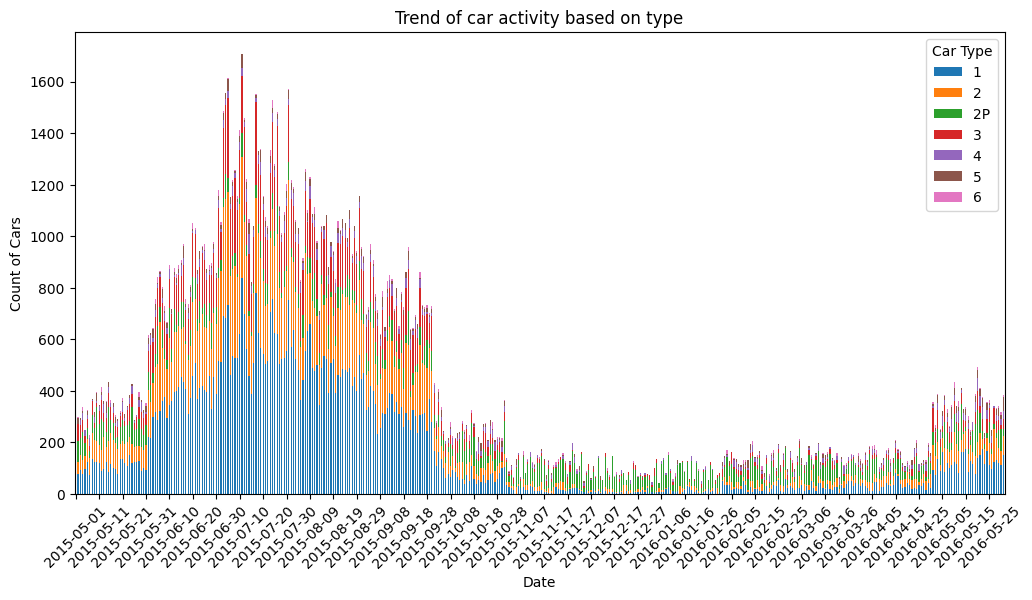

In [7]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trend of car activity based on type')
plt.xlabel('Date')
ax.set_xticks(ax.get_xticks()[::10])
plt.ylabel('Count of Cars')
plt.legend(title='Car Type')
plt.xticks(rotation=45)
plt.show()


In [23]:
all_gates = traffic_data['gate-name'].unique()
all_gates = np.sort(all_gates, axis=0)
all_gates

array(['camping0', 'camping1', 'camping2', 'camping3', 'camping4',
       'camping5', 'camping6', 'camping7', 'camping8', 'entrance0',
       'entrance1', 'entrance2', 'entrance3', 'entrance4', 'gate0',
       'gate1', 'gate2', 'gate3', 'gate4', 'gate5', 'gate6', 'gate7',
       'gate8', 'general-gate0', 'general-gate1', 'general-gate2',
       'general-gate3', 'general-gate4', 'general-gate5', 'general-gate6',
       'general-gate7', 'ranger-base', 'ranger-stop0', 'ranger-stop1',
       'ranger-stop2', 'ranger-stop3', 'ranger-stop4', 'ranger-stop5',
       'ranger-stop6', 'ranger-stop7'], dtype=object)

In [33]:
# Stack Data based on date & gate-name
stacked_data_gate = traffic_day_type_grouped.pivot_table(index='Date', columns='gate-name', values='count', aggfunc='sum', fill_value=0)
stacked_data_gate

gate-name,camping0,camping1,camping2,camping3,camping4,camping5,camping6,camping7,camping8,entrance0,...,general-gate7,ranger-base,ranger-stop0,ranger-stop1,ranger-stop2,ranger-stop3,ranger-stop4,ranger-stop5,ranger-stop6,ranger-stop7
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-01,2,0,4,8,0,2,4,2,4,6,...,26,8,30,0,28,2,2,4,6,0
2015-05-02,2,0,3,5,2,3,3,1,3,11,...,27,6,23,2,23,4,2,2,8,6
2015-05-03,4,0,3,1,3,8,2,1,3,17,...,28,6,21,0,21,4,2,2,6,4
2015-05-04,4,2,1,6,0,1,1,1,5,13,...,26,8,27,2,27,8,2,4,9,6
2015-05-05,3,0,4,0,2,3,4,1,3,13,...,20,6,18,0,16,6,0,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,3,3,1,6,5,2,4,3,7,10,...,23,2,35,0,35,2,0,2,2,0
2016-05-28,2,0,3,6,7,6,0,5,3,15,...,39,2,26,0,26,2,0,0,2,2
2016-05-29,5,5,5,7,4,3,7,0,2,10,...,35,6,24,2,24,0,4,2,8,0


In [36]:
# Combine gates based on types 
stacked_data_gate['ranger-stop'] = stacked_data_gate.filter(like='ranger-stop').sum(axis=1)
stacked_data_gate['entrance'] = stacked_data_gate.filter(like='entrance').sum(axis=1)
stacked_data_gate['gate'] = stacked_data_gate.filter(like='gate').sum(axis=1)
stacked_data_gate['camping'] = stacked_data_gate.filter(like='camping').sum(axis=1)
stacked_data_gate

gate-name,camping0,camping1,camping2,camping3,camping4,camping5,camping6,camping7,camping8,entrance0,...,ranger-stop2,ranger-stop3,ranger-stop4,ranger-stop5,ranger-stop6,ranger-stop7,ranger-stop,entrance,gate,camping
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-01,2,0,4,8,0,2,4,2,4,6,...,28,2,2,4,6,0,144,136,300,52
2015-05-02,2,0,3,5,2,3,3,1,3,11,...,23,4,2,2,8,6,140,116,284,44
2015-05-03,4,0,3,1,3,8,2,1,3,17,...,21,4,2,2,6,4,120,146,258,50
2015-05-04,4,2,1,6,0,1,1,1,5,13,...,27,8,2,4,9,6,170,120,324,42
2015-05-05,3,0,4,0,2,3,4,1,3,13,...,16,6,0,4,6,0,100,124,224,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,3,3,1,6,5,2,4,3,7,10,...,35,2,0,2,2,0,152,160,298,68
2016-05-28,2,0,3,6,7,6,0,5,3,15,...,26,2,0,0,2,2,116,198,288,64
2016-05-29,5,5,5,7,4,3,7,0,2,10,...,24,0,4,2,8,0,128,172,292,76


In [39]:
stacked_data_gate_type = stacked_data_gate[['camping', 'gate','ranger-stop','entrance','ranger-base']]
stacked_data_gate_type

gate-name,camping,gate,ranger-stop,entrance,ranger-base
Date,,,,,
2015-05-01,52,300,144,136,8
2015-05-02,44,284,140,116,6
2015-05-03,50,258,120,146,6
2015-05-04,42,324,170,120,8
2015-05-05,40,224,100,124,6
...,...,...,...,...,...
2016-05-27,68,298,152,160,2
2016-05-28,64,288,116,198,2
2016-05-29,76,292,128,172,6


In [40]:
color_map_all = {
    'camping': 'orange',
    'entrance': 'green',
    'gate': 'red',
    'general-gate': 'teal',
    'ranger-base': 'purple',
    'ranger-stop': 'yellow'
}

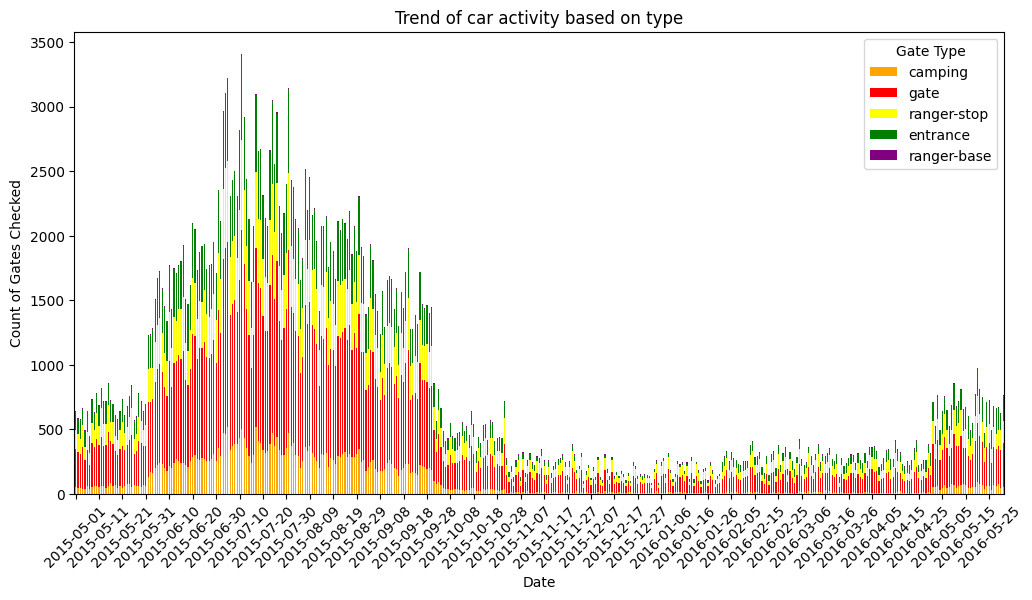

In [41]:
ax = stacked_data_gate_type.plot(kind='bar', stacked=True, figsize=(12, 6), color=color_map_all)

# Add title and labels
plt.title('Trend of car activity based on type')
plt.xlabel('Date')
plt.ylabel('Count of Gates Checked')

# Adjust x-ticks to avoid overcrowding
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation=45)

# Add the custom legend to the plot
plt.legend(title='Gate Type')

# Show the plot
plt.show()

In [26]:
restricted_gates = ['gate0','gate2','gate3','gate4','gate5','gate6','gate7','gate8','ranger-base','ranger-stop0','ranger-stop1','ranger-stop2','ranger-stop3','ranger-stop3','ranger-stop4','ranger-stop5','ranger-stop6','ranger-stop7']

In [27]:
for i in ['1','2','2P','3','4','5','6']:
    car_type_i_data = traffic_data[traffic_data['car-type'] == i]  # Filter for current car type
    print('Car Type '+ i + ' has been through gates:')

    print(set(restricted_gates).intersection(car_type_i_data['gate-name'].unique()))

Car Type 1 has been through gates:
{'ranger-stop1', 'ranger-stop0', 'ranger-stop2'}
Car Type 2 has been through gates:
{'ranger-stop0', 'ranger-stop2'}
Car Type 2P has been through gates:
{'ranger-stop5', 'ranger-stop4', 'gate5', 'ranger-stop3', 'gate4', 'gate0', 'ranger-base', 'ranger-stop6', 'gate6', 'gate3', 'gate2', 'gate8', 'ranger-stop0', 'ranger-stop1', 'ranger-stop2', 'gate7', 'ranger-stop7'}
Car Type 3 has been through gates:
{'ranger-stop0', 'ranger-stop2'}
Car Type 4 has been through gates:
{'gate5', 'ranger-stop3', 'gate6', 'ranger-stop6', 'gate3', 'ranger-stop0', 'ranger-stop2'}
Car Type 5 has been through gates:
{'ranger-stop0', 'ranger-stop2'}
Car Type 6 has been through gates:
{'ranger-stop0', 'ranger-stop2'}


## Inspect Individual Car Type Pattern

In [28]:
traffic_sorted = traffic_data.sort_values(by=['car-id', 'Timestamp'])
traffic_sorted

,Timestamp,car-id,car-type,gate-name,Date
36467,2015-07-01 13:00:09,20150001010009-284,3,entrance3,2015-07-01
36511,2015-07-01 13:20:53,20150001010009-284,3,general-gate1,2015-07-01
36516,2015-07-01 13:23:32,20150001010009-284,3,ranger-stop2,2015-07-01
36524,2015-07-01 13:26:36,20150001010009-284,3,ranger-stop0,2015-07-01
36528,2015-07-01 13:29:51,20150001010009-284,3,general-gate2,2015-07-01
...,...,...,...,...,...
156058,2016-03-29 13:05:01,20165929105935-538,2P,general-gate5,2016-03-29
156061,2016-03-29 13:13:51,20165929105935-538,2P,gate8,2016-03-29
156062,2016-03-29 13:15:15,20165929105935-538,2P,ranger-base,2016-03-29
156234,2016-03-30 18:59:38,20165930065938-555,3,entrance3,2016-03-30


In [29]:
traffic_path = traffic_data.groupby(['car-id', 'car-type']).agg({
    'Timestamp': list,
    'gate-name': list
}).reset_index()

# Renaming columns to clarify the new structure
traffic_path.columns = ['car-id', 'car-type', 'path-timestamps', 'path-gate-names']
traffic_path

,car-id,car-type,path-timestamps,path-gate-names
0,20150001010009-284,3,"[2015-07-01 13:00:09, 2015-07-01 13:20:53, 201...","[entrance3, general-gate1, ranger-stop2, range..."
1,20150001050042-811,1,"[2015-09-01 17:00:42, 2015-09-01 17:16:30, 201...","[entrance2, general-gate6, camping7, camping7,..."
2,20150001060025-421,2,"[2015-09-01 06:00:25, 2015-09-01 06:10:32, 201...","[entrance4, general-gate5, general-gate2, rang..."
3,20150001070000-174,1,"[2015-09-01 07:00:00, 2015-09-01 07:18:27, 201...","[entrance2, general-gate2, ranger-stop0, range..."
4,20150001070006-104,1,"[2015-08-01 07:00:06, 2015-08-01 07:19:37, 201...","[entrance2, general-gate2, ranger-stop0, range..."
...,...,...,...,...
18703,20165928085923-695,1,"[2016-05-28 20:59:23, 2016-05-28 21:24:40]","[entrance3, entrance0]"
18704,20165928125928-824,2,"[2016-05-28 12:59:28, 2016-05-28 13:09:10, 201...","[entrance4, general-gate5, general-gate2, rang..."
18705,20165929085939-676,2P,"[2016-04-29 08:59:39, 2016-04-29 09:01:01, 201...","[ranger-base, gate8, general-gate5, gate3, ran..."
18706,20165929105935-538,2P,"[2016-03-29 10:59:35, 2016-03-29 11:00:57, 201...","[ranger-base, gate8, gate5, ranger-stop6, rang..."


In [30]:
traffic_path.iloc[0]['path-gate-names']

['entrance3',
 'general-gate1',
 'ranger-stop2',
 'ranger-stop0',
 'general-gate2',
 'general-gate5',
 'camping6',
 'camping6',
 'entrance2']

Get the path coordinates from the bmp file

In [31]:
# pip install pillows

In [32]:
from PIL import Image
import numpy as np

# Load the image
map = Image.open('hw03-data/Traffic Data/Lekagul Roadways.bmp')

# Convert to numpy array
map_data = np.array(map)
print(map_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
# Define the coordinates for each gate/location
gates_coordinates = {
    'camping0': (52, 41), 'camping1': (129, 50), 'camping2': (44, 64), 'camping3': (45, 68),
    'camping4': (48, 89), 'camping5': (20, 121), 'camping6': (150, 177), 'camping7': (181, 145),
    'camping8': (183, 48), 'entrance0': (62, 13), 'entrance1': (17, 67), 'entrance2': (183, 87),
    'entrance3': (115, 167), 'entrance4': (140, 184), 'gate0': (63, 33), 'gate1': (58, 44),
    'gate2': (24, 54), 'gate3': (149, 60), 'gate4': (164, 114), 'gate5': (131, 146),
    'gate6': (116, 151), 'gate7': (97, 161), 'gate8': (138, 181), 'general-gate0': (110, 9),
    'general-gate1': (64, 25), 'general-gate2': (104, 32), 'general-gate3': (186, 55),
    'general-gate4': (69, 98), 'general-gate5': (124, 111), 'general-gate6': (136, 137),
    'general-gate7': (65, 144), 'ranger-base': (128, 175), 'ranger-stop0': (89, 16),
    'ranger-stop1': (19, 24), 'ranger-stop2': (80, 35), 'ranger-stop3': (148, 45),
    'ranger-stop4': (18, 95), 'ranger-stop5': (151, 118), 'ranger-stop6': (123, 147),
    'ranger-stop7': (100, 152)
}

Example visualization showing one car's path -- not used eventually

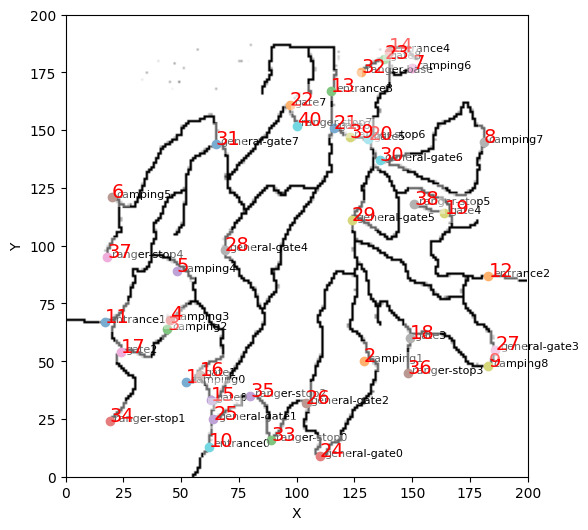

In [36]:
# Plot the map, area, and path
plt.figure(figsize=(6, 6))

reverted_map = 200 - map_data
plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

# Plot each location
for name, (x, y) in gates_coordinates.items():
    plt.scatter(x, y, label=name)
    plt.text(x + 2, y, name, fontsize=8)

# Annotate the path with gate names and timestamps
for i, gate in enumerate(gates_coordinates):
    x, y = gates_coordinates[gate]

    # # Annotate timestamps below
    # plt.text(x, y - 5, timestamps[i], fontsize=8, color='red', 
    #          bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))  # Annotate timestamps below
    
    plt.text(x, y, str(i + 1), fontsize=14, color='red', 
             bbox=dict(facecolor='white', alpha=0.4, edgecolor='none'))  # Use index as number

# Set the limits and titles
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xlabel("X")
plt.ylabel("Y")


# Show the plot
plt.show()

In [37]:
# Convert gates_coordinates into a DataFrame
gates_df = pd.DataFrame.from_dict(gates_coordinates, orient='index', columns=['x', 'y'])
gates_df.index.name = 'gate-name'
gates_df.reset_index(inplace=True)

# Merge traffic_data with gates_df to include coordinates
traffic_data = traffic_data.merge(gates_df, on='gate-name', how='left')
traffic_data

,Timestamp,car-id,car-type,gate-name,Date,x,y
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,2015-05-01,115,167
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,2015-05-01,64,25
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,2015-05-01,80,35
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,2015-05-01,89,16
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,2015-05-01,104,32
...,...,...,...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2,2016-05-31,80,35
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4,2016-05-31,69,98
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1,2016-05-31,64,25
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7,2016-05-31,65,144


In [38]:
# Group by 'gate-name' and count occurrences
gate_counts = traffic_data.groupby('gate-name').size().reset_index(name='count')

# Display the count DataFrame
print(gate_counts)

# Merge counts back into the original DataFrame (if needed)
traffic_data_count = traffic_data.merge(gate_counts, on='gate-name', how='left')
traffic_data_count

        gate-name  count
0        camping0   1590
1        camping1    340
2        camping2   2280
3        camping3   2464
4        camping4   2772
5        camping5   3184
6        camping6   2465
7        camping7   2190
8        camping8   3220
9       entrance0   6576
10      entrance1   6267
11      entrance2   7133
12      entrance3   8531
13      entrance4   6953
14          gate0    124
15          gate1    124
16          gate2    440
17          gate3   1234
18          gate4    916
19          gate5   1671
20          gate6   1185
21          gate7    670
22          gate8   1996
23  general-gate0    216
24  general-gate1  14677
25  general-gate2  14801
26  general-gate3    859
27  general-gate4  10974
28  general-gate5   9435
29  general-gate6   2194
30  general-gate7  16119
31    ranger-base   1996
32   ranger-stop0  15078
33   ranger-stop1    466
34   ranger-stop2  15019
35   ranger-stop3   1236
36   ranger-stop4    612
37   ranger-stop5    920
38   ranger-stop6   1878


,Timestamp,car-id,car-type,gate-name,Date,x,y,count
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,2015-05-01,115,167,8531
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,2015-05-01,64,25,14677
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,2015-05-01,80,35,15019
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,2015-05-01,89,16,15078
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,2015-05-01,104,32,14801
...,...,...,...,...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2,2016-05-31,80,35,15019
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4,2016-05-31,69,98,10974
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1,2016-05-31,64,25,14677
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7,2016-05-31,65,144,16119


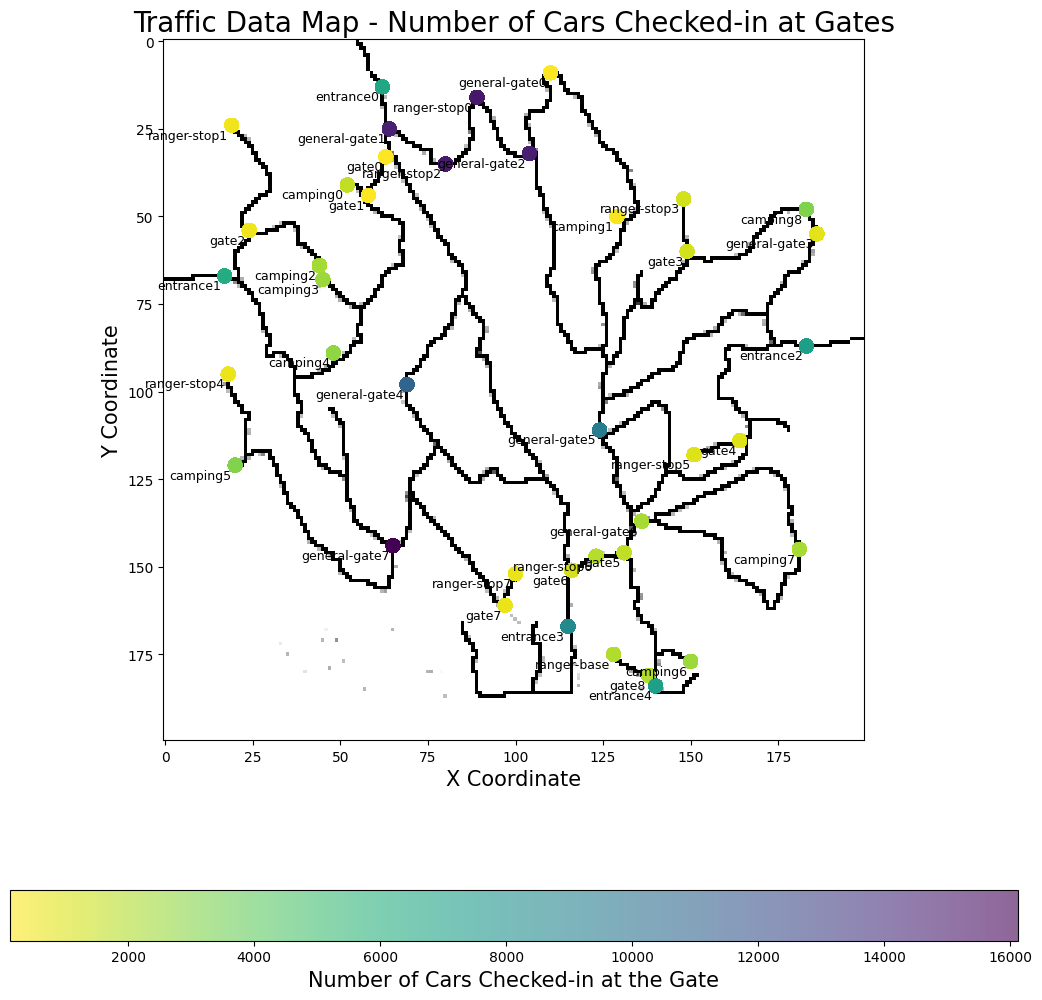

In [39]:
# Set up the figure
plt.figure(figsize=(13, 13))

reverted_map = 200 - map_data
plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

# Plot each location
for name, (x, y) in gates_coordinates.items():
    plt.scatter(x, y, label=name)
    plt.text(x-1, y+1, name, fontsize=9, ha = 'right', ma = 'left', va = 'top')
    # plt.text(x + 2, y, name, fontsize=10, ha = 'left')
    


# Create a scatter plot
scatter = plt.scatter(
    traffic_data['x'], 
    traffic_data['y'], 
    c=traffic_data_count['count'],  # Use counts for color
    cmap='viridis_r', 
    alpha=0.6,
    s = 90,
    # edgecolor='k'  # Add edge color to points for better visibility
)

# Add horizontal color bar for legend
cb = plt.colorbar(scatter, orientation='horizontal')
cb.set_label('Number of Cars Checked-in at the Gate', fontsize = '15')

# Set titles and labels
plt.title('Traffic Data Map - Number of Cars Checked-in at Gates', fontsize = '20')
plt.xlabel('X Coordinate', fontsize = '15')
plt.ylabel('Y Coordinate', fontsize = '15')


# Show the plot
plt.show()


        gate-name  count
0        camping0    759
1        camping1    198
2        camping2   1186
3        camping3   1308
4        camping4   1399
5        camping5   1580
6        camping6   1290
7        camping7   1110
8        camping8   1469
9       entrance0   2744
10      entrance1   2538
11      entrance2   3023
12      entrance3   3782
13      entrance4   2895
14  general-gate0    126
15  general-gate1   6329
16  general-gate2   6327
17  general-gate3    253
18  general-gate4   4896
19  general-gate5   3594
20  general-gate6   1114
21  general-gate7   7112
22   ranger-stop0   6327
23   ranger-stop1     12
24   ranger-stop2   6327
                Timestamp              car-id car-type      gate-name  \
0     2015-05-01 01:31:41  20153101013141-937        1      entrance3   
1     2015-05-01 01:53:34  20153101013141-937        1  general-gate1   
2     2015-05-01 01:56:20  20153101013141-937        1   ranger-stop2   
3     2015-05-01 01:59:36  20153101013141-937        1   r

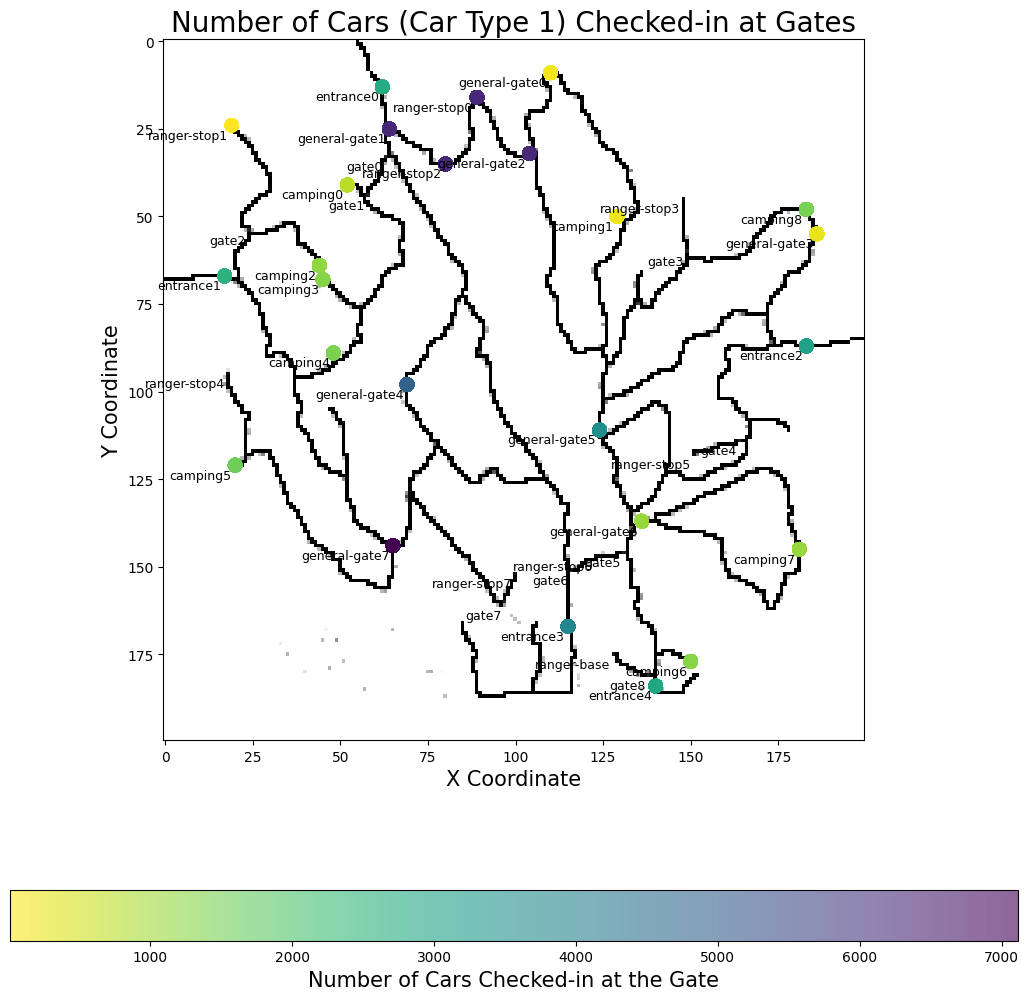

        gate-name  count
0        camping0    449
1        camping1     62
2        camping2    610
3        camping3    647
4        camping4    826
5        camping5    902
6        camping6    604
7        camping7    526
8        camping8    770
9       entrance0   1750
10      entrance1   1645
11      entrance2   1881
12      entrance3   2230
13      entrance4   1950
14  general-gate0     39
15  general-gate1   3815
16  general-gate2   3815
17  general-gate3    140
18  general-gate4   2972
19  general-gate5   2189
20  general-gate6    526
21  general-gate7   4221
22   ranger-stop0   3815
23   ranger-stop2   3815
                Timestamp              car-id car-type      gate-name  \
0     2015-05-01 05:42:01  20154201054201-550        2      entrance2   
1     2015-05-01 05:59:25  20154201054201-550        2      entrance4   
2     2015-05-01 08:10:35  20151001081035-840        2      entrance4   
3     2015-05-01 08:20:35  20151001081035-840        2  general-gate5   
4     2015

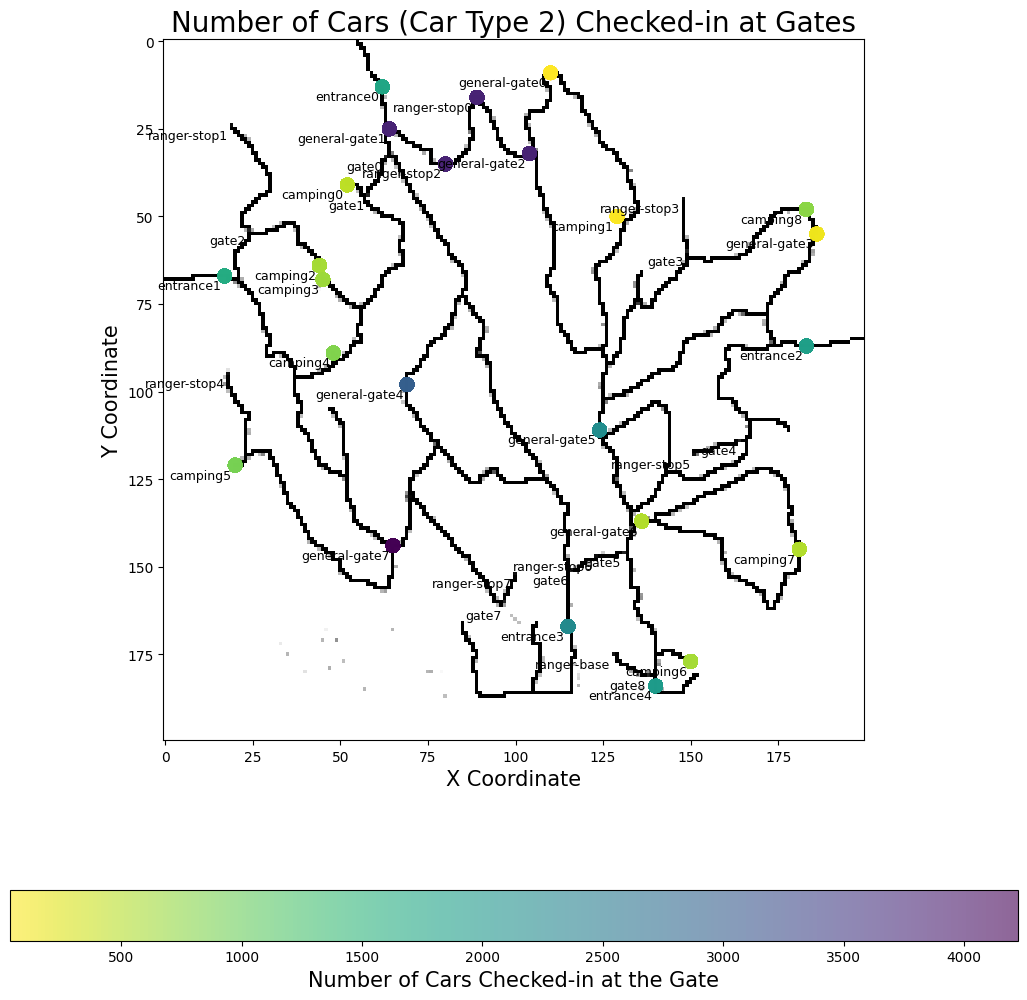

        gate-name  count
0        camping0    298
1        camping1     74
2        camping2    380
3        camping3    433
4        camping4    459
5        camping5    632
6        camping6    495
7        camping7    438
8        camping8    522
9       entrance0   1157
10      entrance1   1067
11      entrance2   1214
12      entrance3   1499
13      entrance4   1140
14  general-gate0     49
15  general-gate1   2515
16  general-gate2   2515
17  general-gate3     92
18  general-gate4   1877
19  general-gate5   1429
20  general-gate6    438
21  general-gate7   2674
22   ranger-stop0   2515
23   ranger-stop2   2515
                Timestamp              car-id car-type      gate-name  \
0     2015-05-01 03:01:46  20150101030146-497        3      entrance4   
1     2015-05-01 03:21:55  20150101030146-497        3      entrance2   
2     2015-05-01 05:49:32  20154901054932-304        3      entrance1   
3     2015-05-01 05:55:05  20154901054932-304        3       camping2   
4     2015

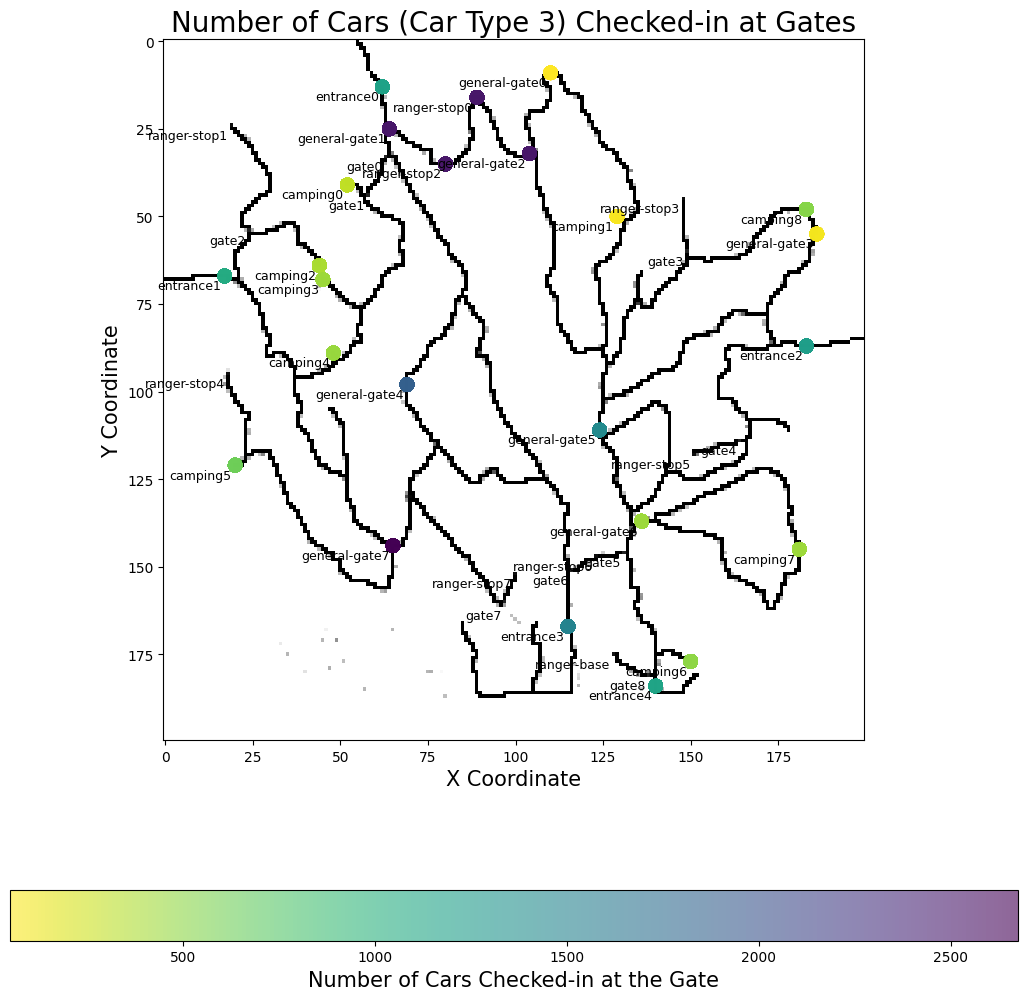

        gate-name  count
0       entrance0    476
1       entrance1    508
2       entrance2    509
3       entrance3    531
4       entrance4    476
5           gate3     46
6           gate5     46
7           gate6     46
8   general-gate1    731
9   general-gate2    731
10  general-gate4    370
11  general-gate5    396
12  general-gate7    504
13   ranger-stop0    731
14   ranger-stop2    731
15   ranger-stop3     46
16   ranger-stop6     46
               Timestamp              car-id car-type      gate-name  \
0    2015-05-01 00:43:28  20154301124328-262        4      entrance3   
1    2015-05-01 01:03:48  20154301124328-262        4  general-gate1   
2    2015-05-01 01:06:24  20154301124328-262        4   ranger-stop2   
3    2015-05-01 01:09:25  20154301124328-262        4   ranger-stop0   
4    2015-05-01 01:12:36  20154301124328-262        4  general-gate2   
...                  ...                 ...      ...            ...   
6919 2016-05-31 15:11:57  20164831024800-307  

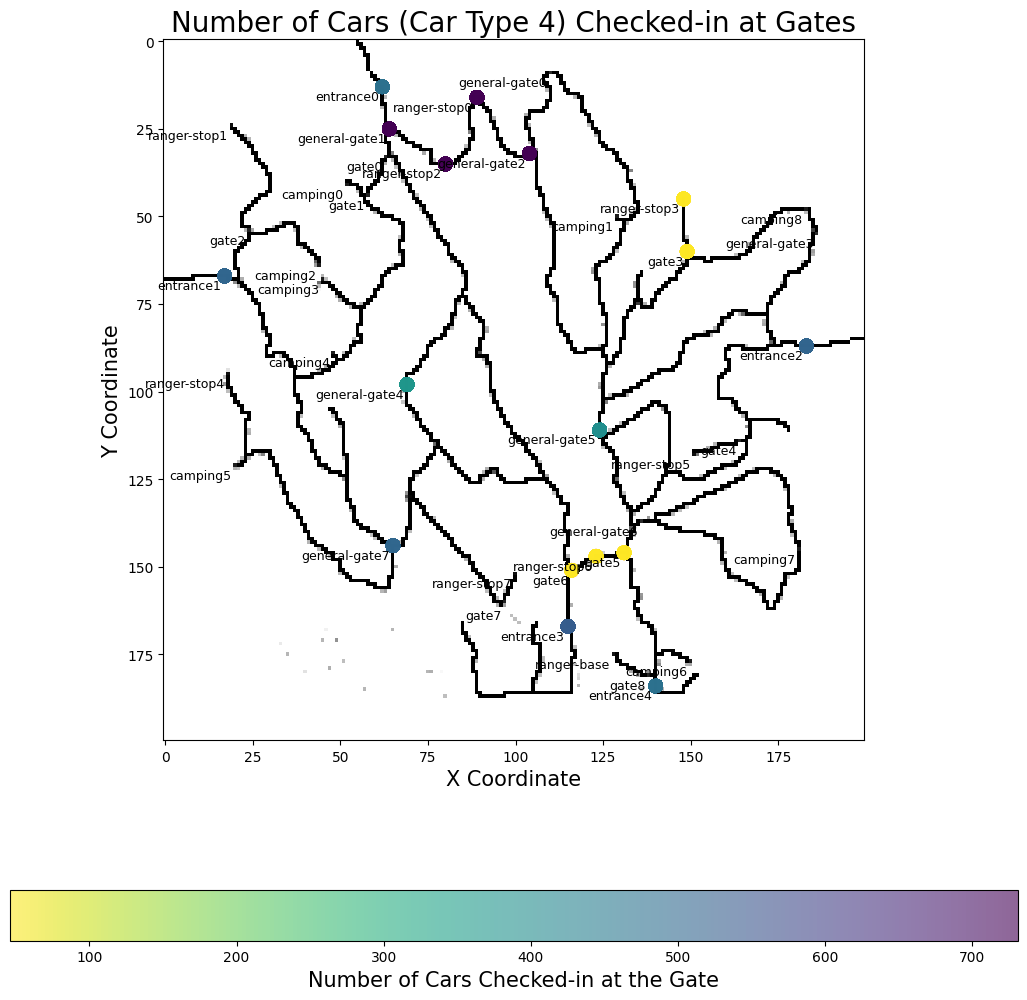

        gate-name  count
0       entrance0    302
1       entrance1    338
2       entrance2    327
3       entrance3    327
4       entrance4    340
5   general-gate1    501
6   general-gate2    501
7   general-gate4    252
8   general-gate5    257
9   general-gate7    338
10   ranger-stop0    501
11   ranger-stop2    501
               Timestamp              car-id car-type      gate-name  \
0    2015-05-01 03:40:19  20154001034019-109        5      entrance3   
1    2015-05-01 04:02:55  20154001034019-109        5  general-gate1   
2    2015-05-01 04:05:47  20154001034019-109        5   ranger-stop2   
3    2015-05-01 04:09:09  20154001034019-109        5   ranger-stop0   
4    2015-05-01 04:12:40  20154001034019-109        5  general-gate2   
...                  ...                 ...      ...            ...   
4480 2016-05-31 20:02:52  20165831075824-693        5   ranger-stop2   
4481 2016-05-31 20:06:09  20165831075824-693        5   ranger-stop0   
4482 2016-05-31 20:09:37  2

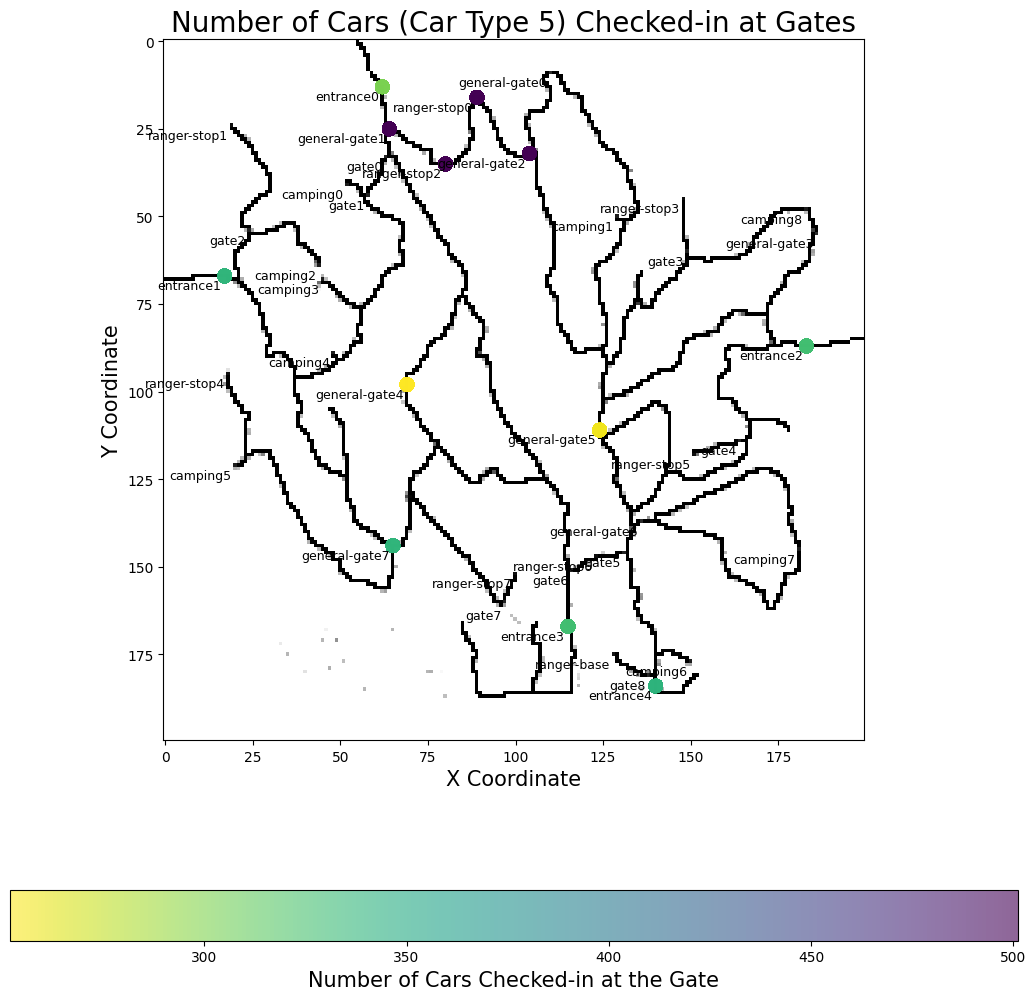

        gate-name  count
0       entrance0    147
1       entrance1    171
2       entrance2    179
3       entrance3    162
4       entrance4    152
5   general-gate1    241
6   general-gate2    241
7   general-gate4    136
8   general-gate5    107
9   general-gate7    171
10   ranger-stop0    241
11   ranger-stop2    241
               Timestamp              car-id car-type      gate-name  \
0    2015-05-02 07:06:49  20150602070649-231        6      entrance3   
1    2015-05-02 07:23:19  20150602070649-231        6  general-gate7   
2    2015-05-02 07:37:52  20150602070649-231        6      entrance1   
3    2015-05-04 02:37:50  20153704023750-346        6      entrance1   
4    2015-05-04 02:49:30  20153704023750-346        6  general-gate7   
...                  ...                 ...      ...            ...   
2184 2016-05-31 23:33:00  20161031111001-854        6  general-gate2   
2185 2016-05-31 23:36:42  20161031111001-854        6   ranger-stop0   
2186 2016-05-31 23:40:13  2

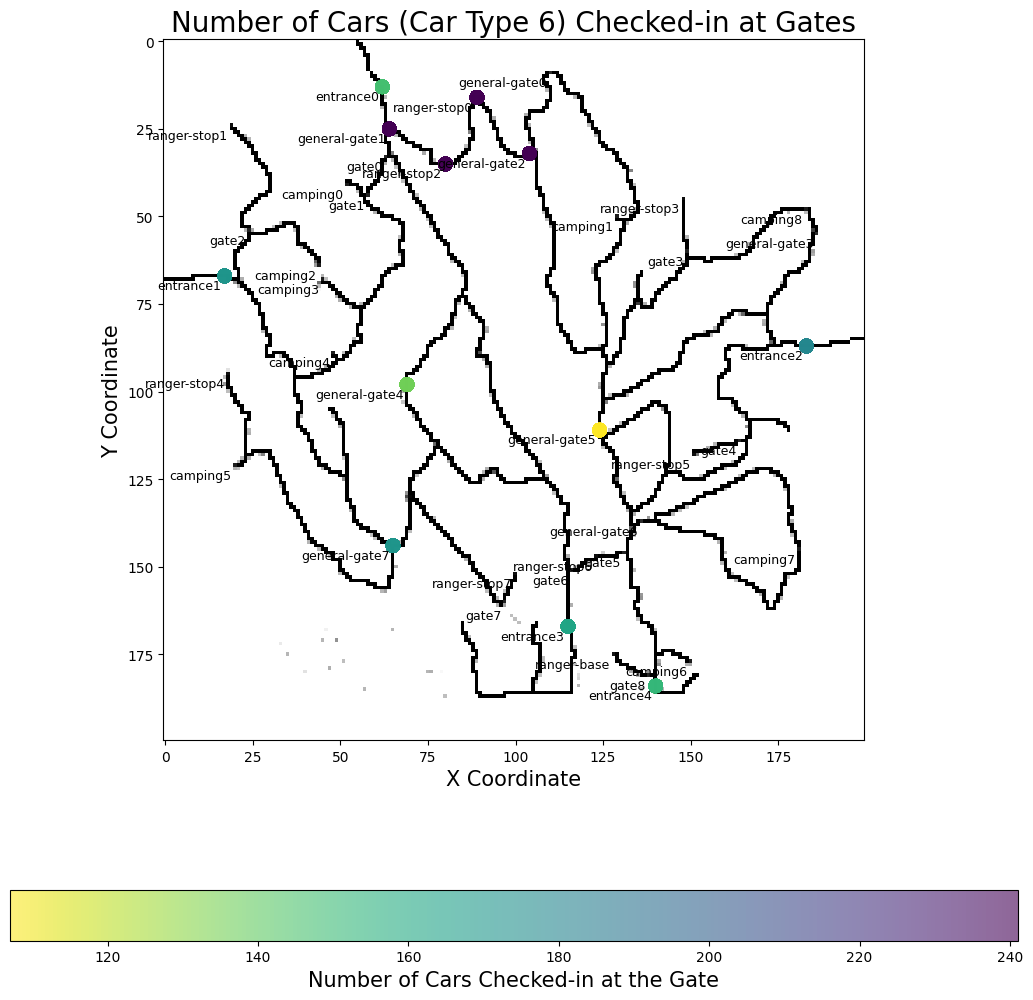

        gate-name  count
0        camping0     84
1        camping1      6
2        camping2    104
3        camping3     76
4        camping4     88
5        camping5     70
6        camping6     76
7        camping7    116
8        camping8    459
9           gate0    124
10          gate1    124
11          gate2    440
12          gate3   1188
13          gate4    916
14          gate5   1625
15          gate6   1139
16          gate7    670
17          gate8   1996
18  general-gate0      2
19  general-gate1    545
20  general-gate2    671
21  general-gate3    374
22  general-gate4    471
23  general-gate5   1463
24  general-gate6    116
25  general-gate7   1099
26    ranger-base   1996
27   ranger-stop0    948
28   ranger-stop1    454
29   ranger-stop2    889
30   ranger-stop3   1190
31   ranger-stop4    612
32   ranger-stop5    920
33   ranger-stop6   1832
34   ranger-stop7    672
                Timestamp              car-id car-type      gate-name  \
0     2015-05-01 07:52:09  

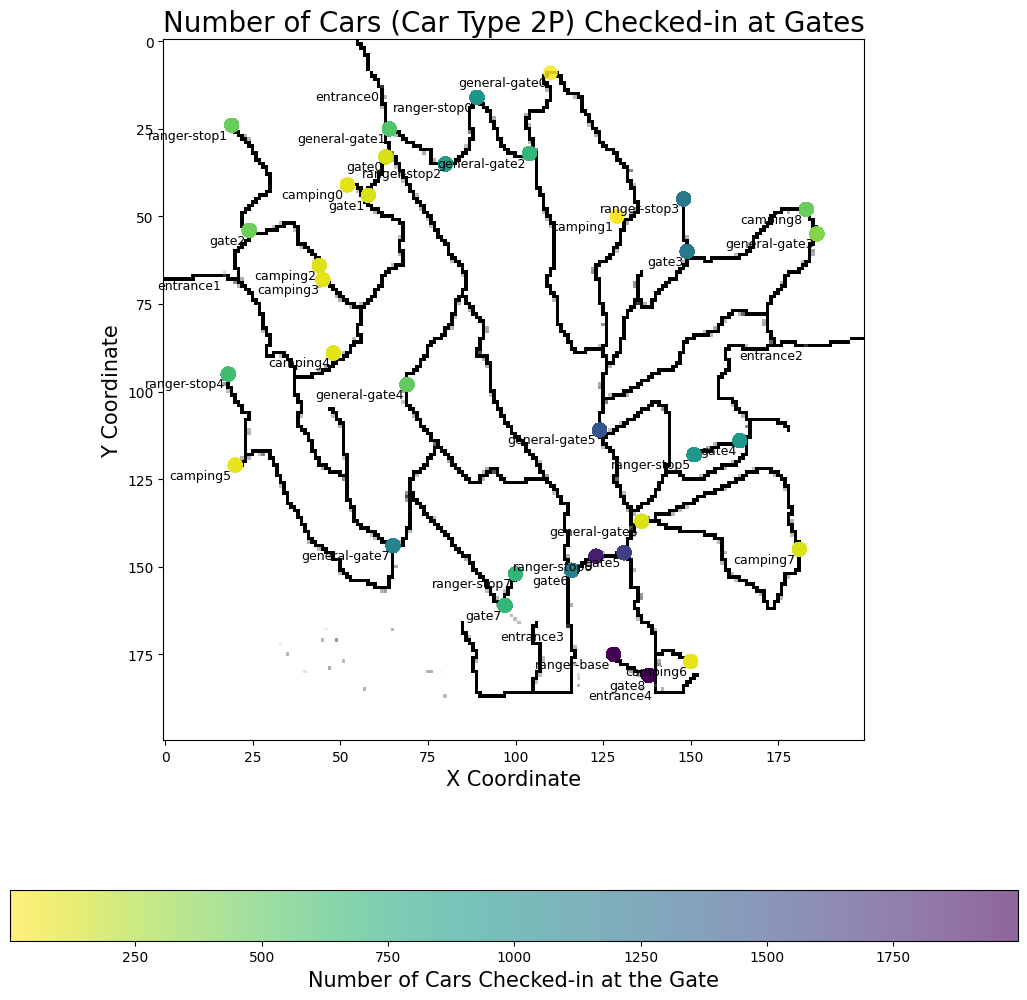

In [40]:
# Define the car types as a list of strings
car_types = ['1', '2', '3', '4', '5', '6', '2P']

# Loop through each car type, visualize the data, and set the dynamic title
for i in car_types:
    car_type_i = traffic_data[traffic_data['car-type'] == i]  # Filter for current car type

    # Group by 'gate-name' and count occurrences
    gate_counts = car_type_i.groupby('gate-name').size().reset_index(name='count')

    # Display the gate count DataFrame
    print(gate_counts)

    # Merge counts back into the original DataFrame (if needed)
    car_type_count = car_type_i.merge(gate_counts, on='gate-name', how='left')

    # Display the car type count DataFrame
    print(car_type_count)


    # Set up the figure
    plt.figure(figsize=(13, 13))
    reverted_map = 200 - map_data
    plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

    # Plot each location
    for name, (x, y) in gates_coordinates.items():
        # plt.scatter(x, y, label=name)
        plt.text(x-1, y+1, name, fontsize=9, ha = 'right', ma = 'left', va = 'top')
        # plt.text(x + 2, y, name, fontsize=10, ha = 'left')

    # Create a scatter plot
    scatter = plt.scatter(
        car_type_i['x'], 
        car_type_i['y'], 
        c=car_type_count['count'],  # Use counts for color
        cmap='viridis_r', 
        alpha=0.6,
        s = 90,
        # edgecolor='k'  # Add edge color to points for better visibility
    )

    # Add horizontal color bar for legend
    cb = plt.colorbar(scatter, orientation='horizontal')
    cb.set_label('Number of Cars Checked-in at the Gate', fontsize = '15')

    # Set titles and labels
    plt.title(f'Number of Cars (Car Type {i}) Checked-in at Gates', fontsize=20)
    plt.xlabel('X Coordinate', fontsize = '15')
    plt.ylabel('Y Coordinate', fontsize = '15')


    # Show the plot
    plt.show()